In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Heart Data Aalysis

In [15]:
file_path = "heart+disease/processed.cleveland.data"
column_names = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal', 'class']
heart_data = pd.read_csv(file_path, delimiter=",", header=None, names=column_names)
print(heart_data.shape)
for i in range(len(heart_data)):
    if heart_data['class'].iloc[i] != 0:
        heart_data.loc[i, "class"] = 1
    else:
        continue
heart_data['number of vessels colored'] = pd.to_numeric(heart_data['number of vessels colored'], errors='coerce')
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')

heart_data.dropna(inplace=True)

shuffled_heart_data = heart_data.sample(frac=1)
shuffled_heart_data.reset_index(inplace = True, drop = True)
print(heart_data.shape)

(303, 14)
(297, 14)


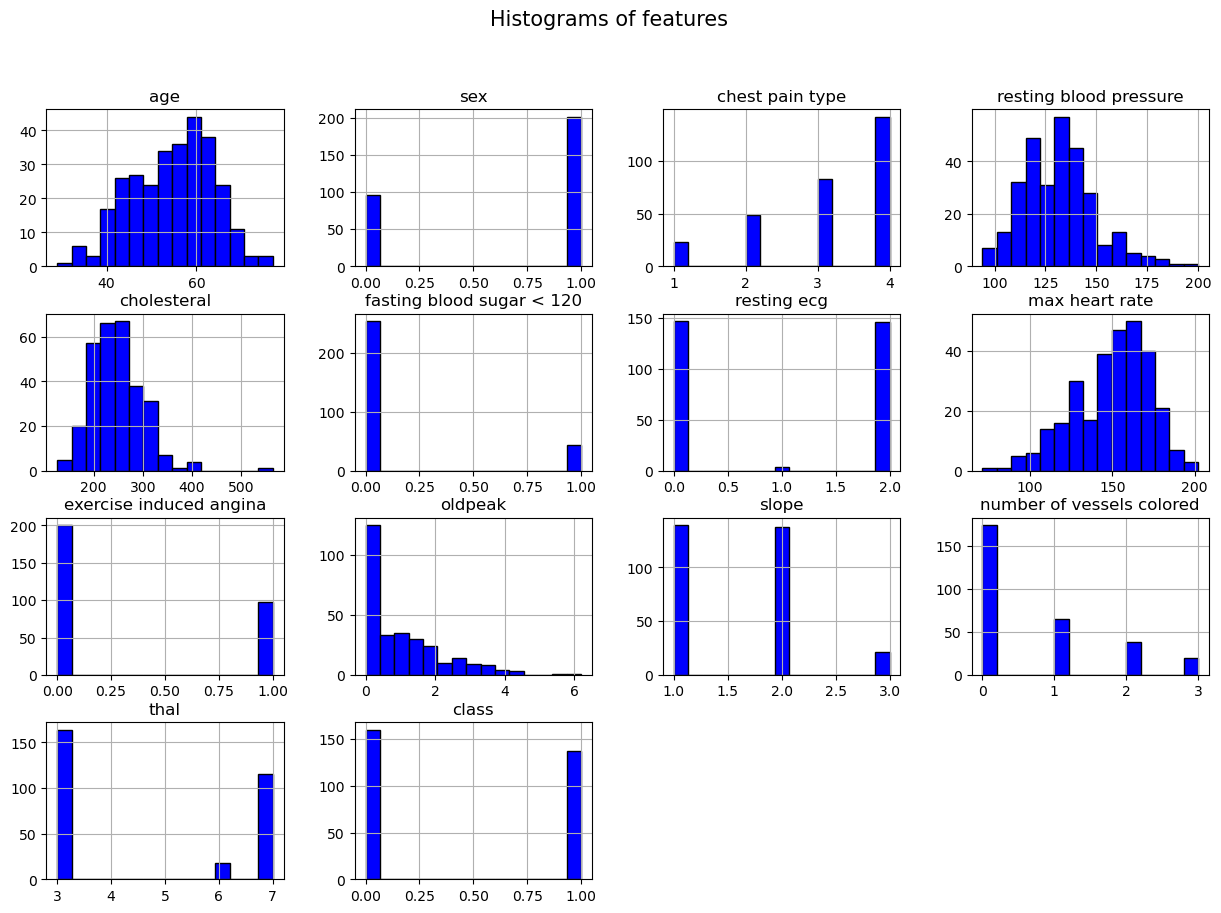

In [5]:
heart_data.iloc[:,:].hist(bins = 15, figsize = (15,10), layout = (4,4), color = 'blue', edgecolor = 'black')
plt.suptitle('Histograms of features', fontsize = 15)
plt.show()

In [11]:
correlation_matrix = heart_data.corr()

# Create a mask for the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find the features that are highly correlated
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)
print("No data points are correlated above the threshold")

Highly correlated features to drop: []
No data points are correlated above the threshold


Parkinsons Data Analysis

(195, 24)


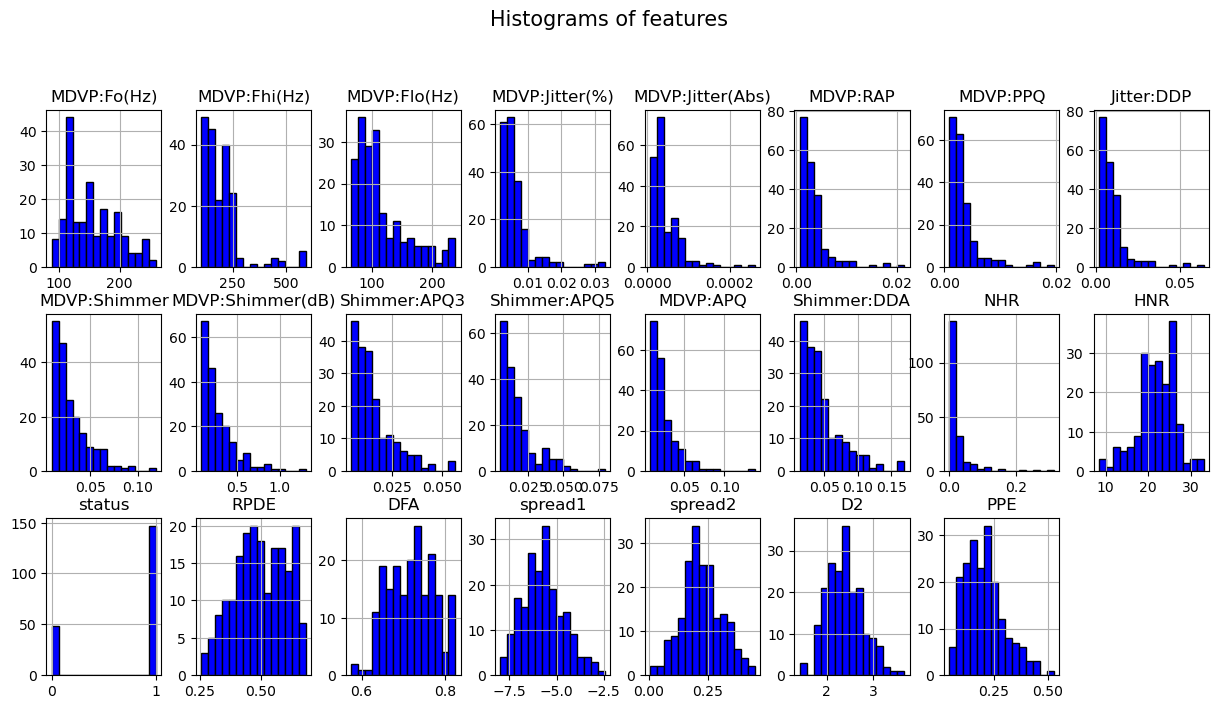

Highly correlated features to drop: ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'PPE']


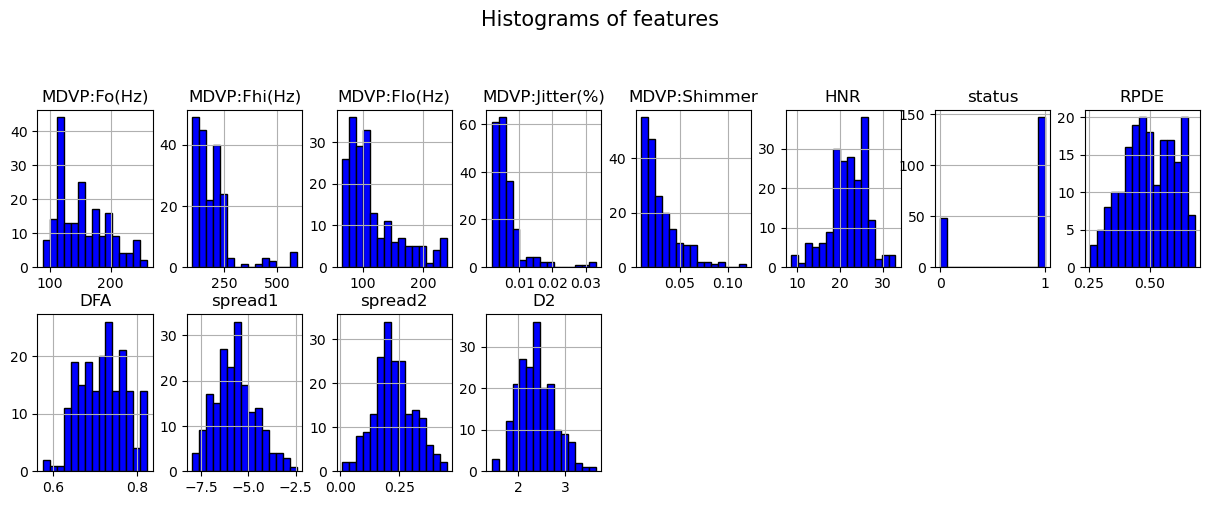

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Shimmer  \
0        119.992       157.302        74.997         0.00784       0.04374   
1        122.400       148.650       113.819         0.00968       0.06134   
2        116.682       131.111       111.555         0.01050       0.05233   
3        116.676       137.871       111.366         0.00997       0.05492   
4        116.014       141.781       110.655         0.01284       0.06425   
..           ...           ...           ...             ...           ...   
190      174.188       230.978        94.261         0.00459       0.04087   
191      209.516       253.017        89.488         0.00564       0.02751   
192      174.688       240.005        74.287         0.01360       0.02308   
193      198.764       396.961        74.904         0.00740       0.02296   
194      214.289       260.277        77.973         0.00567       0.01884   

        HNR  status      RPDE       DFA   spread1   spread2    

In [19]:
file_path = "parkinsons/parkinsons.data"
parkin_data = pd.read_csv(file_path, delimiter=",", header=0)
print(parkin_data.shape)
parkin_data.drop(columns=parkin_data.columns[0], inplace=True)

parkin_data.dropna(inplace=True)
# parkin_data.info()


parkin_data.iloc[:,:].hist(bins = 15, figsize = (15,10), layout = (4,8), color = 'blue', edgecolor = 'black')
plt.suptitle('Histograms of features', fontsize = 15)
plt.show()

correlation_matrix = parkin_data.corr()

# Create a mask for the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find the features that are highly correlated
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)

# Drop the highly correlated features
parkin_data_reduced = parkin_data.drop(columns=to_drop)

parkin_data_reduced.iloc[:,:].hist(bins = 15, figsize = (15,10), layout = (4,8), color = 'blue', edgecolor = 'black')
plt.suptitle('Histograms of features', fontsize = 15)
plt.show()

print(parkin_data_reduced)

In [21]:
file_path = "breast+cancer/breast-cancer.data"
column_names = ['class', 'age', 'menopause', 'tumor size', 'inv nodes', 'node capes', 'deg malig', 'breast', 'breast quad', 'irradiat'] 

print(len(column_names))
breast_data =  pd.read_csv(file_path, delimiter=",", header=None, names=column_names)
print(breast_data.shape)
class_map = {'no-recurrence-events': 0, 'recurrence-events' : 1} #0 is healthy

age_mapping = {
    '10-19': 15,
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80-89': 85,
    '90-99': 95
}
meno_mapping = {
    'lt40' : 0,
    'ge40' : 1,
    'premeno' : 2
}
size_mapping = {
'0-4' : 2,
'5-9' : 7,
'10-14' : 12,
'15-19' : 17,
'20-24' : 22,
'25-29' : 27,
'30-34' : 32,
'35-39' : 37,
'40-44' : 42,
'45-49' : 47,
'50-54' : 52,
'55-59' : 57
}

node_mapping = {
'0-2' : 2,
'3-5' : 5,
'6-8' : 8,
'9-11' : 11,
'12-14' : 14,
'15-17' : 17,
'18-20' : 20,
'21-23' : 23,
'24-26' : 26,
'27-29' : 29,
'30-32' : 32,
'33-35' : 35,
'36-39' : 39
}
y_n_map = {'yes': 0, 'no':1}
side_map = {'left': 0, 'right':1}
quad_map = {
'left_up' : 0,
'left_low' : 1,
'right_up' : 2,
'right_low' : 3,
'central' : 4,
}
breast_data['class'] = breast_data['class'].replace(class_map)
breast_data['age'] = breast_data['age'].replace(age_mapping)
breast_data['menopause'] = breast_data['menopause'].replace(meno_mapping)
breast_data['tumor size'] = breast_data['tumor size'].replace(size_mapping)
breast_data['inv nodes'] = breast_data['inv nodes'].replace(node_mapping)
breast_data['node capes'] = breast_data['node capes'].replace(y_n_map)
breast_data['breast'] = breast_data['breast'].replace(side_map)
breast_data['breast quad'] = breast_data['breast quad'].replace(quad_map)
breast_data['irradiat'] = breast_data['irradiat'].replace(y_n_map)

breast_data['node capes'] = pd.to_numeric(breast_data['node capes'], errors='coerce')
breast_data['breast quad'] = pd.to_numeric(breast_data['breast quad'], errors='coerce')

breast_data.dropna(inplace=True) #Dropped 9 entries, as Nan
breast_data.info()

print(breast_data.shape)

10
(286, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        277 non-null    int64  
 1   age          277 non-null    int64  
 2   menopause    277 non-null    int64  
 3   tumor size   277 non-null    int64  
 4   inv nodes    277 non-null    int64  
 5   node capes   277 non-null    float64
 6   deg malig    277 non-null    int64  
 7   breast       277 non-null    int64  
 8   breast quad  277 non-null    float64
 9   irradiat     277 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 23.8 KB
(277, 10)


/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_44917/3926511377.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['class'] = breast_data['class'].replace(class_map)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_44917/3926511377.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['age'] = breast_data['age'].replace(age_mapping)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_44917/3926511377.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will

Highly correlated features to drop: []
No data points are correlated above the threshold


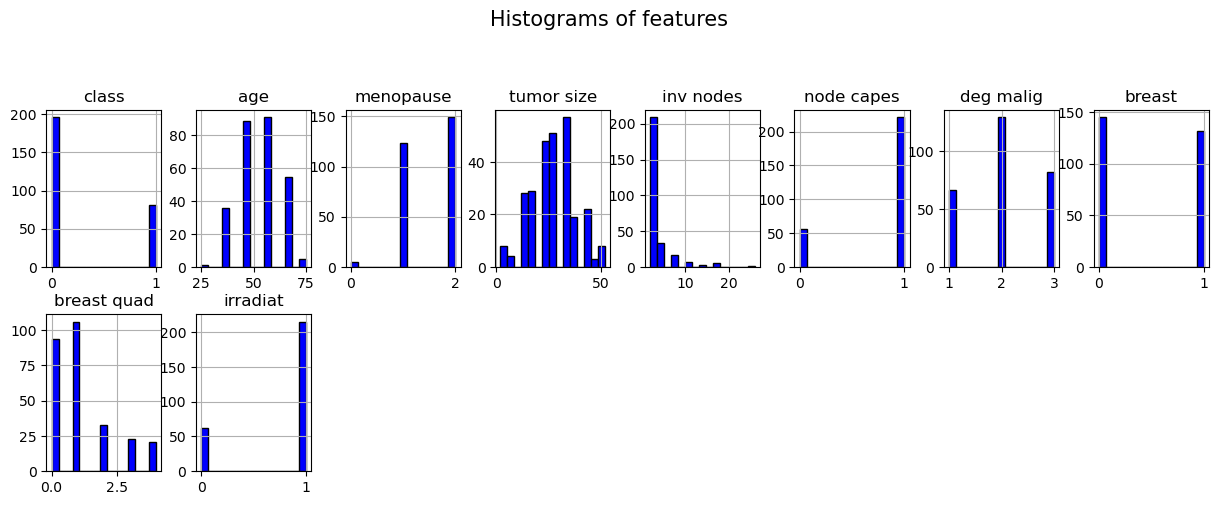

In [23]:
correlation_matrix = breast_data.corr()

# Create a mask for the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find the features that are highly correlated
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)
print("No data points are correlated above the threshold")

breast_data.iloc[:,:].hist(bins = 15, figsize = (15,10), layout = (4,8), color = 'blue', edgecolor = 'black')
plt.suptitle('Histograms of features', fontsize = 15)
plt.show()

Precision= True Positives/True Positives + False Positives​
accuracy of the positive predictions made by the model. It is calculated as:
87% class 0 were right, 82% clas 1 were right

Recall = True Positives/True Positives + False Negatives
 model to identify all actual positive instances. It is calculated as:
87% class 0 were right, 82% clas 1 were right

​f1:  is the harmonic mean of precision and recall and is a balanced measure of both. It is especially useful when dealing with imbalanced datasets.

The confusion matrix indicates that the model is better at predicting Class 0 but makes some false positives (Class 1 predicted as Class 0) and false negatives (Class 0 predicted as Class 1).

